In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



In [2]:
participants = pd.read_csv('/workspaces/Major-Project-Nicotine-Retention/data/Nicotine Delivery Retention/Sheet 1-participants, and tobacco cigarette use at screening.csv')
deviceAndLiquids = pd.read_csv('/workspaces/Major-Project-Nicotine-Retention/data/Nicotine Delivery Retention/Sheet 2-Participants’ usual e-cigarettes and e-liquids used in the study.csv')
deliveryAndRetention = pd.read_csv('/workspaces/Major-Project-Nicotine-Retention/data/Nicotine Delivery Retention/Sheet 3-Nicotine delivered and retained in the body and changes in vegetable glycerin (VG) propylene glycol (PG) ratios in e-liquid and exhaled aerosol.csv')
pharmacokineticProfile = pd.read_csv('/workspaces/Major-Project-Nicotine-Retention/data/Nicotine Delivery Retention/Sheet 4-Nicotine pharmacokinetic profiles from various electronic cigarettes.csv')


In [3]:
participants.head()

,Subject,Sex,Age (years),Race,BMI,Saliva cotinine (ng/mL),Self-reported smoking status,Expired CO (ppm),CPD,E-cig use (months),E-cig puffs per session,E-cig puffs per day
0,1,F,56,White,19.0,505,No,2,0,12,10,300
1,2,F,31,White,17.9,432,No,3,0,18,30,200
2,3,F,19,Asian,22.0,181,Yes,10,2,3,20,80
3,4,M,30,White,26.1,233,No,2,0,12,3,50
4,5,F,53,White,24.3,303,Yes,10,3,3,6,24


In [4]:
deviceAndLiquids.head() 

,Subject,E-cigarette design,E-cigarette brand,e-Liquid Brand,Flavor,VG/PG ratio,Measured VG/PG ratio,Nicotine on label (mg/mL),Measured nicotine (ug/mg)
0,1,Tank,Kanger EVOD2,Velvet Cloud Vapor,White Beard Tobacco,Kosher VG,92/8,24,15.3
1,2,Cartridge,V2 Cigs Red 18,NaN,Regular,not labeled,25/75,18,13.9
2,3,Tank,Kanger T3D,V Smoke,Watermelon Breeze,not labeled,71/29,18,11.4
3,4,RBA,Vulcan,Space Jam,Andromeda,VG/PG,54/46,6,5.7
4,5,Tank,Kanger T3D,Jackson Vapor,Peaches & Cream,not labeled,72/28,18,15.3


In [5]:
deliveryAndRetention.head() 

,Subject,E-liquid\nvaped\n(mg),Nicotine\nin e-liquid\n(ug/mg),Nicotine\ndelivered\n(mg),Nicotine\nexhaled\n(mg),%\nNicotine\nretained,VG\ndelivered\n(mg),PG\ndelivered\n(mg),VG\nexhaled\n(mg),PG\nexhaled\n(mg),%VG\nretained,%PG\nretained,VG/PG\nratio in\nexhalant
0,1,55.2,15.3,0.84,0.004,99.6,44.5,3.96,1.28,0.07,97.1,98.3,95/5
1,2,117.9,13.9,1.64,0.002,99.9,24.6,74.70,1.14,0.06,95.3,99.9,95/5
2,3,146.2,11.4,1.66,0.848,49.0,86.6,35.10,83.20,18.9,3.9,46.2,81/19
3,4,463.2,5.7,2.64,0.293,88.9,216.1,182.00,42.50,24.3,80.3,86.7,64/36
4,5,87.0,15.3,1.33,0.033,97.5,56.8,22.00,7.64,0.60,86.6,97.3,93/7


In [6]:
pharmacokineticProfile.head()

,Subject,Half-life (min),Tmax (min),Cmax (ng/mL),AUC(0→∞) (ng/mL•min),Delivered nicotine dose (mg),Retained nicotine dose (mg),PK-estimated nicotine dose (mg)
0,1,148,2,6.9,815,0.84,0.84,0.98
1,2,81,5,9.1,1345,1.64,1.63,1.61
2,3,87,30,2.3,301,1.66,0.82,0.36
3,4,152,5,8.9,1570,2.64,2.34,1.88
4,5,62,2,15.5,682,1.33,1.30,0.82


In [7]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Subject                       13 non-null     int64  
 1   Sex                           13 non-null     object 
 2   Age (years)                   13 non-null     int64  
 3   Race                          13 non-null     object 
 4   BMI                           13 non-null     float64
 5   Saliva cotinine (ng/mL)       13 non-null     int64  
 6   Self-reported smoking status  13 non-null     object 
 7   Expired CO (ppm)              13 non-null     int64  
 8   CPD                           13 non-null     int64  
 9   E-cig use (months)            13 non-null     int64  
 10  E-cig puffs per session       13 non-null     int64  
 11  E-cig puffs per day           13 non-null     int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.3+ KB


In [8]:
print(participants['Sex'].value_counts())
print("--------------------------------\n")
print(participants['Race'].value_counts())
print("--------------------------------\n")
print(participants['Self-reported smoking status'].value_counts())


M    7
F    6
Name: Sex, dtype: int64
--------------------------------

White    9
Asian    2
Mixed    1
Black    1
Name: Race, dtype: int64
--------------------------------

No     9
Yes    4
Name: Self-reported smoking status, dtype: int64


In [9]:
participants['Self-reported smoking status'] = participants['Self-reported smoking status'].replace({'Yes': 1, 'No': 0})
participants['Sex'] = participants['Sex'].replace({'M' : 1, 'F' : 0})
participants['Race'] = participants['Race'].replace({'White' : 1, 'Black' : 2, 'Asian' : 3,'Mixed' : 4})
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Subject                       13 non-null     int64  
 1   Sex                           13 non-null     int64  
 2   Age (years)                   13 non-null     int64  
 3   Race                          13 non-null     int64  
 4   BMI                           13 non-null     float64
 5   Saliva cotinine (ng/mL)       13 non-null     int64  
 6   Self-reported smoking status  13 non-null     int64  
 7   Expired CO (ppm)              13 non-null     int64  
 8   CPD                           13 non-null     int64  
 9   E-cig use (months)            13 non-null     int64  
 10  E-cig puffs per session       13 non-null     int64  
 11  E-cig puffs per day           13 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 1.3 KB


<Axes: >

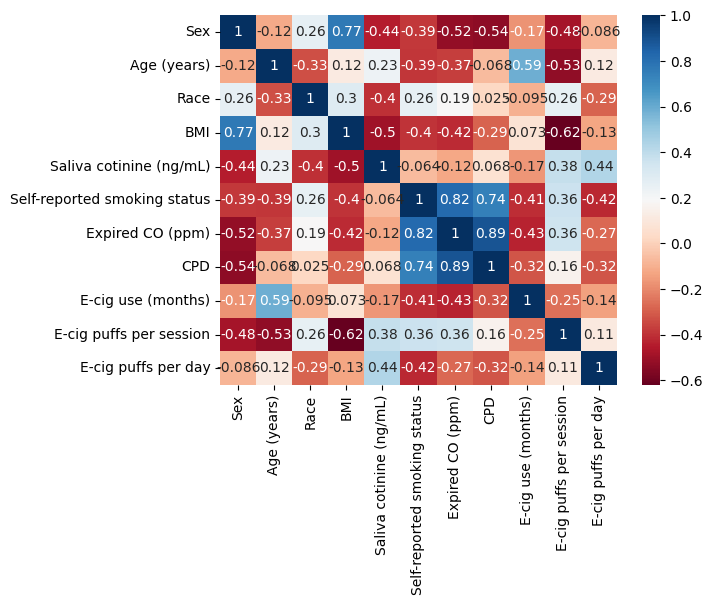

In [10]:
participants_raw = participants.drop('Subject', axis=1)

# Create correlation matrix
corr_matrix = participants_raw.corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')


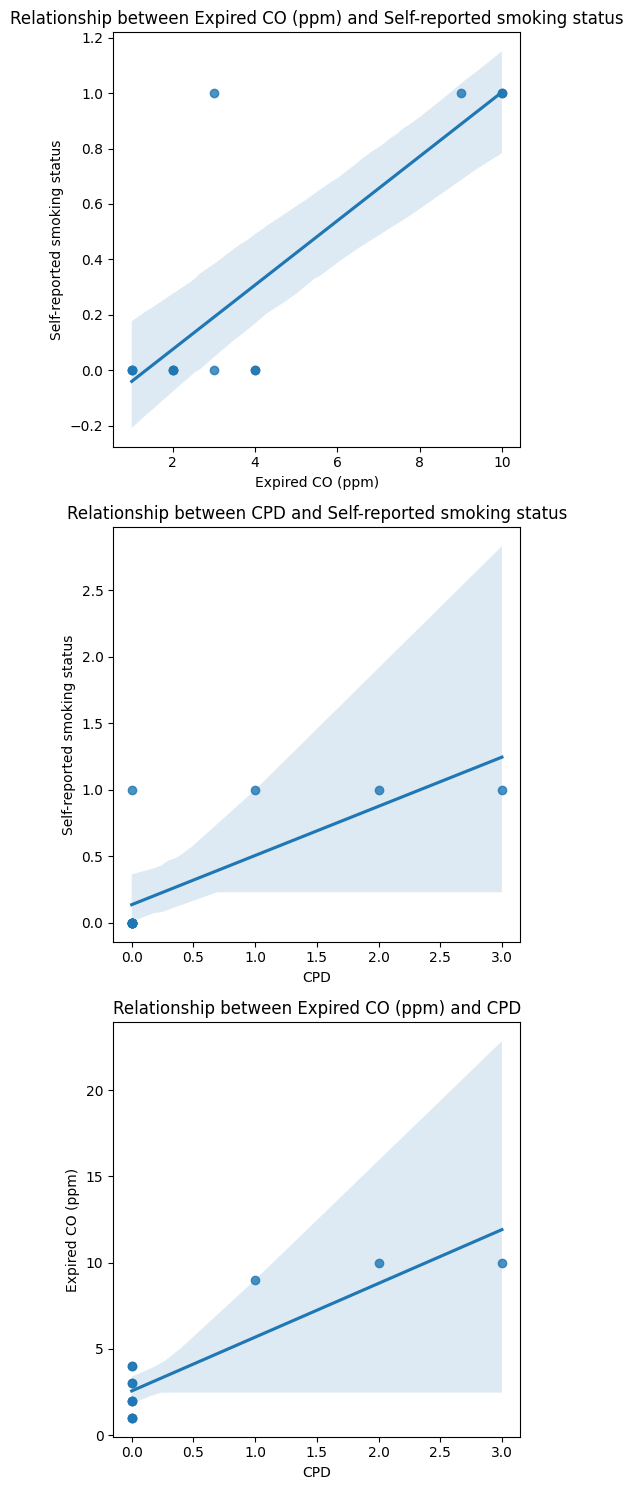

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Scatter plot with regression line
sns.regplot(x=participants_raw['Expired CO (ppm)'], y=participants_raw['Self-reported smoking status'], ax=axes[0])
axes[0].set_ylabel('Self-reported smoking status')
axes[0].set_xlabel('Expired CO (ppm)')
axes[0].set_title('Relationship between Expired CO (ppm) and Self-reported smoking status')

sns.regplot(x=participants_raw['CPD'], y=participants_raw['Self-reported smoking status'], ax=axes[1])
axes[1].set_ylabel('Self-reported smoking status')
axes[1].set_xlabel('CPD')
axes[1].set_title('Relationship between CPD and Self-reported smoking status')

sns.regplot(x=participants_raw['CPD'], y=participants_raw['Expired CO (ppm)'], ax=axes[2])
axes[2].set_xlabel('CPD')
axes[2].set_ylabel('Expired CO (ppm)')
axes[2].set_title('Relationship between Expired CO (ppm) and CPD')

plt.tight_layout()
plt.show()


In [12]:
p_value = pearsonr(participants_raw['Self-reported smoking status'], participants_raw['Expired CO (ppm)'])[1]

print("p-value:", p_value)

p_value = pearsonr(participants_raw['Self-reported smoking status'], participants_raw['CPD'])[1]

print("p-value:", p_value)

p_value = pearsonr(participants_raw['CPD'], participants_raw['Expired CO (ppm)'])[1]

print("p-value:", p_value)



p-value: 0.0006247724160751565
p-value: 0.003487059049853685
p-value: 4.803945677156132e-05


The pairs of variables being compared are:

'Self-reported smoking status' and 'Expired CO (ppm)'
'Self-reported smoking status' and 'CPD'
'CPD' and 'Expired CO (ppm)'
The p-values obtained from these comparisons are:

For 'Self-reported smoking status' and 'Expired CO (ppm)': The p-value is approximately 0.000625, which is very close to 0. This indicates a statistically significant correlation between these two variables.

For 'Self-reported smoking status' and 'CPD': The p-value is approximately 0.00349, which is less than 0.05. This also indicates a statistically significant correlation between these two variables.

For 'CPD' and 'Expired CO (ppm)': The p-value is approximately 0.000048, which is very close to 0. This indicates a statistically significant correlation between these two variables.

In all three cases, the p-values are less than 0.05, which typically indicates a statistically significant correlation. This means that it's very unlikely that the observed correlations occurred by chance.

In [13]:
p_value = pearsonr(participants_raw['E-cig puffs per day'], participants_raw['Saliva cotinine (ng/mL)'])[1]

print("p-value:", p_value)

p-value: 0.13722303403601435


In this case, the p-value is 0.137, which is greater than 0.05. This means that we fail to reject the null hypothesis, implying that there is no significant correlation between 'E-cig puffs per day' and 'Saliva cotinine (ng/mL)' in the given dataset.

In [14]:
print(participants.columns)
print(deviceAndLiquids.columns)
print(deliveryAndRetention.columns)
print(pharmacokineticProfile.columns)




Index(['Subject', 'Sex', 'Age (years)', 'Race', 'BMI',
       'Saliva cotinine (ng/mL)', 'Self-reported smoking status',
       'Expired CO (ppm)', 'CPD', 'E-cig use (months)',
       'E-cig puffs per session', 'E-cig puffs per day'],
      dtype='object')
Index(['Subject', 'E-cigarette design', 'E-cigarette brand', 'e-Liquid Brand',
       'Flavor', 'VG/PG ratio', 'Measured VG/PG ratio',
       'Nicotine on label (mg/mL)', 'Measured nicotine (ug/mg)'],
      dtype='object')
Index(['Subject', 'E-liquid\nvaped\n(mg)', 'Nicotine\nin e-liquid\n(ug/mg)',
       'Nicotine\ndelivered\n(mg)', 'Nicotine\nexhaled\n(mg)',
       '%\nNicotine\nretained', 'VG\ndelivered\n(mg)', 'PG\ndelivered\n(mg)',
       'VG\nexhaled\n(mg)', 'PG\nexhaled\n(mg)', '%VG\nretained',
       '%PG\nretained', 'VG/PG\nratio in\nexhalant'],
      dtype='object')
Index(['Subject', 'Half-life (min)', 'Tmax (min)', 'Cmax (ng/mL)',
       'AUC(0→∞) (ng/mL•min)', 'Delivered nicotine dose (mg)',
       'Retained nicotine dose

In [15]:
# Select the required columns
participants_selected = participants[['Subject', 'Saliva cotinine (ng/mL)', 'Self-reported smoking status', 'Expired CO (ppm)', 'E-cig puffs per session']]
deviceAndLiquids_selected = deviceAndLiquids[['Subject', 'E-cigarette design', 'VG/PG ratio', 'Nicotine on label (mg/mL)', 'Measured nicotine (ug/mg)']]
deliveryAndRetention_selected = deliveryAndRetention[['Subject', 'E-liquid\nvaped\n(mg)', 'Nicotine\ndelivered\n(mg)','%\nNicotine\nretained']]

# Merge the dataframes
merged_df = participants_selected.merge(deviceAndLiquids_selected, on='Subject').merge(deliveryAndRetention_selected, on='Subject')

# Print the new dataframe
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Subject                       13 non-null     int64  
 1   Saliva cotinine (ng/mL)       13 non-null     int64  
 2   Self-reported smoking status  13 non-null     int64  
 3   Expired CO (ppm)              13 non-null     int64  
 4   E-cig puffs per session       13 non-null     int64  
 5   E-cigarette design            13 non-null     object 
 6   VG/PG ratio                   13 non-null     object 
 7   Nicotine on label (mg/mL)     13 non-null     int64  
 8   Measured nicotine (ug/mg)     13 non-null     float64
 9   E-liquid
vaped
(mg)           12 non-null     float64
 10  Nicotine
delivered
(mg)       12 non-null     float64
 11  %
Nicotine
retained           12 non-null     float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.3+ KB
None


In [16]:
print(merged_df['E-cigarette design'].value_counts())
print("--------------------------------\n")
merged_df['E-cigarette design'] = merged_df['E-cigarette design'].replace({'Tank': 2, 'RBA': 3, 'Cartridge': 1})
print(merged_df['E-cigarette design'].value_counts())



Tank         8
RBA          3
Cartridge    2
Name: E-cigarette design, dtype: int64
--------------------------------

2    8
3    3
1    2
Name: E-cigarette design, dtype: int64


In [17]:
merged_df2 = merged_df.drop('VG/PG ratio', axis=1)
merged_df2 = merged_df2.drop('Subject', axis=1)


# Create correlation matrix
corr_matrix = merged_df2.corr()
merged_df2.corr()


,Saliva cotinine (ng/mL),Self-reported smoking status,Expired CO (ppm),E-cig puffs per session,E-cigarette design,Nicotine on label (mg/mL),Measured nicotine (ug/mg),E-liquid\nvaped\n(mg),Nicotine\ndelivered\n(mg),%\nNicotine\nretained
Saliva cotinine (ng/mL),1.000000,-0.064447,-0.122539,0.381607,-0.389609,0.731503,0.793871,-0.234892,0.159922,0.082831
Self-reported smoking status,-0.064447,1.000000,0.818466,0.361266,0.187500,0.101130,0.114659,0.084545,0.177227,-0.579752
Expired CO (ppm),-0.122539,0.818466,1.000000,0.355988,0.038366,0.186236,0.232563,-0.097358,0.104649,-0.626351
E-cig puffs per session,0.381607,0.361266,0.355988,1.000000,-0.256689,0.336505,0.316058,-0.018449,0.213952,-0.367678
E-cigarette design,-0.389609,0.187500,0.038366,-0.256689,1.000000,-0.665772,-0.635875,0.791264,0.407129,-0.110438
Nicotine on label (mg/mL),0.731503,0.101130,0.186236,0.336505,-0.665772,1.000000,0.919017,-0.569076,-0.130952,-0.144365
Measured nicotine (ug/mg),0.793871,0.114659,0.232563,0.316058,-0.635875,0.919017,1.000000,-0.543254,0.038704,-0.054685
E-liquid\nvaped\n(mg),-0.234892,0.084545,-0.097358,-0.018449,0.791264,-0.569076,-0.543254,1.000000,0.753269,-0.139440
Nicotine\ndelivered\n(mg),0.159922,0.177227,0.104649,0.213952,0.407129,-0.130952,0.038704,0.753269,1.000000,-0.281139
%\nNicotine\nretained,0.082831,-0.579752,-0.626351,-0.367678,-0.110438,-0.144365,-0.054685,-0.139440,-0.281139,1.000000


<Axes: >

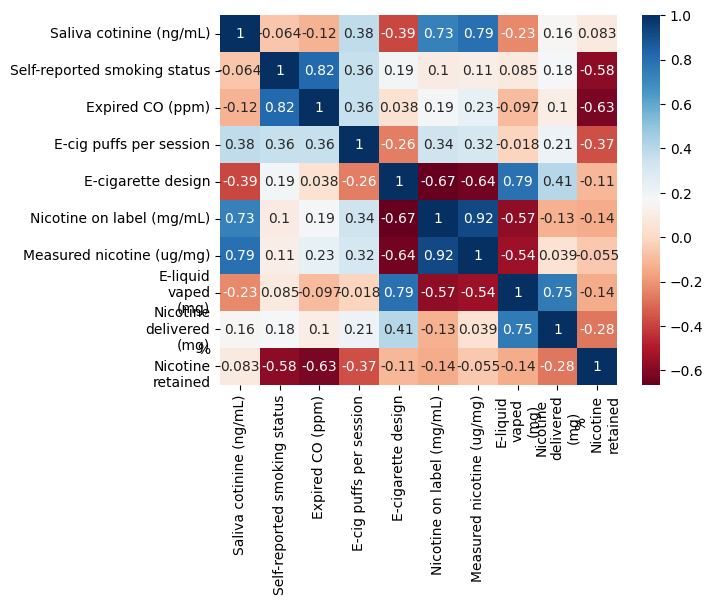

In [18]:
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')

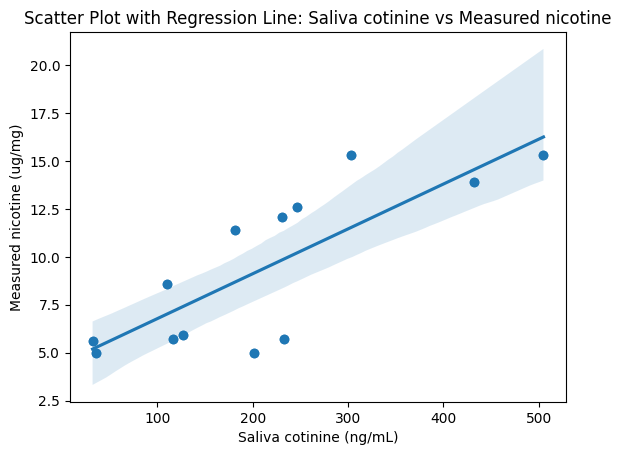

In [19]:
plt.scatter(merged_df2['Saliva cotinine (ng/mL)'], merged_df2['Measured nicotine (ug/mg)'])
sns.regplot(x=merged_df2['Saliva cotinine (ng/mL)'], y=merged_df2['Measured nicotine (ug/mg)'])
plt.xlabel('Saliva cotinine (ng/mL)')
plt.ylabel('Measured nicotine (ug/mg)')
plt.title('Scatter Plot with Regression Line: Saliva cotinine vs Measured nicotine')
plt.show()


This scatter plot visualizes the relationship between the 'Saliva cotinine (ng/mL)' and 'Measured nicotine (ug/mg)' variables from our dataset. Each point on the plot represents a single observation from the dataset, with its 'Saliva cotinine (ng/mL)' value on the x-axis and its 'Measured nicotine (ug/mg)' value on the y-axis.

The line in the plot is a regression line, which is a line of best fit through the data points. This line is calculated using a method called "least squares", which minimizes the sum of the squared residuals (the differences between the observed and predicted values).

From this plot, we can visually assess the correlation between 'Saliva cotinine (ng/mL)' and 'Measured nicotine (ug/mg)'. If the points cluster along the line and the line has a positive slope, this indicates a positive correlation between the two variables. If the line has a negative slope, this indicates a negative correlation. If the points are scattered widely around the line, this indicates a weak correlation.

In [20]:
# Calculate Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(merged_df2['Saliva cotinine (ng/mL)'], merged_df2['Measured nicotine (ug/mg)'])

print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

Pearson correlation: 0.794
p-value: 0.001


The Pearson correlation coefficient is 0.794, which indicates a strong positive linear relationship between 'Saliva cotinine (ng/mL)' and 'Measured nicotine (ug/mg)'. This means that as the values of 'Saliva cotinine (ng/mL)' increase, the values of 'Measured nicotine (ug/mg)' also tend to increase.

The p-value is 0.001, which is less than the commonly used significance level of 0.05. This means that the correlation observed in the data is statistically significant, and it is very unlikely that this correlation is due to chance alone. Therefore, we can reject the null hypothesis of no correlation between 'Saliva cotinine (ng/mL)' and 'Measured nicotine (ug/mg)'.

In conclusion, the analysis suggests a strong and statistically significant positive correlation between 'Saliva cotinine (ng/mL)' and 'Measured nicotine (ug/mg)'.


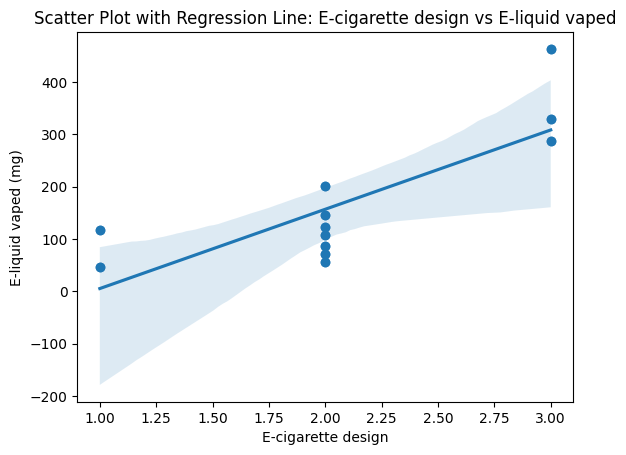

In [21]:
plt.scatter(merged_df2['E-cigarette design'], merged_df2['E-liquid\nvaped\n(mg)'])
sns.regplot(x=merged_df2['E-cigarette design'], y=merged_df2['E-liquid\nvaped\n(mg)'])
plt.xlabel('E-cigarette design')
plt.ylabel('E-liquid vaped (mg)')
plt.title('Scatter Plot with Regression Line: E-cigarette design vs E-liquid vaped')
plt.show()

In [22]:
merged_df = merged_df.drop(merged_df[merged_df['Subject'] == 6].index)

corr, p_value = pearsonr(merged_df['E-cigarette design'], merged_df['E-liquid\nvaped\n(mg)'])

print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')


Pearson correlation: 0.791
p-value: 0.002


The Pearson correlation coefficient is 0.791, which indicates a strong positive linear relationship between 'E-cigarette design' and 'E-liquid vaped (mg)'. This means that as the values of 'E-cigarette design' increase, the values of 'E-liquid vaped (mg)' also tend to increase.

The p-value is 0.002, which is less than the commonly used significance level of 0.05. This means that the correlation observed in the data is statistically significant, and it is very unlikely that this correlation is due to chance alone. Therefore, we can reject the null hypothesis of no correlation between 'E-cigarette design' and 'E-liquid vaped (mg)'.

In conclusion, the analysis suggests a strong and statistically significant positive correlation between 'E-cigarette design' and 'E-liquid vaped (mg)'.

In [23]:
summarize = merged_df.describe()
summarize.loc['mean']

Subject                           7.083333
Saliva cotinine (ng/mL)         220.250000
Self-reported smoking status      0.250000
Expired CO (ppm)                  3.583333
E-cig puffs per session           9.166667
E-cigarette design                2.083333
Nicotine on label (mg/mL)        12.500000
Measured nicotine (ug/mg)         9.458333
E-liquid\nvaped\n(mg)           169.341667
Nicotine\ndelivered\n(mg)         1.326667
%\nNicotine\nretained            93.791667
Name: mean, dtype: float64

In [24]:
# Perform hypothesis test
corr, p_value = pearsonr(merged_df['Nicotine\ndelivered\n(mg)'], merged_df['E-cigarette design'])

# Print the results
print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



Pearson correlation: 0.407
p-value: 0.189
Fail to reject the null hypothesis


In this case, the Pearson correlation between 'Nicotine delivered (mg)' and 'E-cigarette design' is 0.407. This suggests a moderate positive correlation, meaning that as the 'E-cigarette design' value increases, the 'Nicotine delivered (mg)' tends to increase as well.

The p-value is used in hypothesis testing to help you support or reject the null hypothesis. It represents the probability that the results of your test occurred at random. If p-value is less than 0.05 (5%), you reject the null hypothesis. If p-value is greater than or equal to 0.05, you fail to reject the null hypothesis.

In this case, the p-value is 0.189, which is greater than 0.05. Therefore, we fail to reject the null hypothesis. This means that the correlation you observed (0.407) could have happened by chance, and it's not statistically significant.



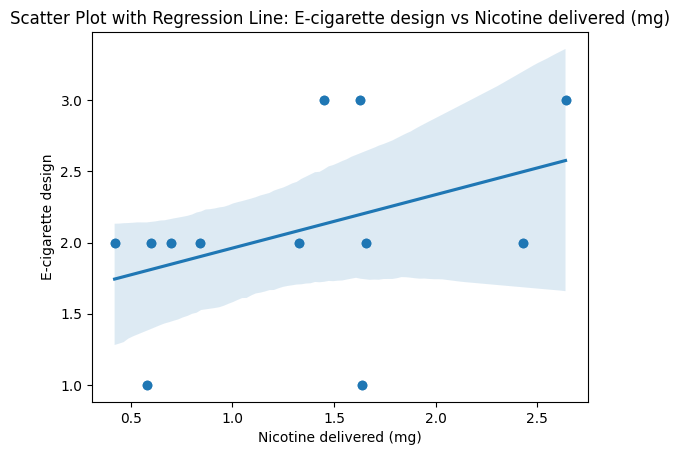

In [25]:
plt.scatter(merged_df['Nicotine\ndelivered\n(mg)'], merged_df['E-cigarette design'])
sns.regplot(x=merged_df['Nicotine\ndelivered\n(mg)'], y=merged_df['E-cigarette design'])
plt.xlabel('Nicotine delivered (mg)')
plt.ylabel('E-cigarette design')
plt.title('Scatter Plot with Regression Line: E-cigarette design vs Nicotine delivered (mg)')
plt.show()

In [26]:
# Perform hypothesis test
corr, p_value = pearsonr(merged_df['Nicotine on label (mg/mL)'], merged_df['E-cigarette design'])

# Print the results
print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Pearson correlation: -0.667
p-value: 0.018
Reject the null hypothesis


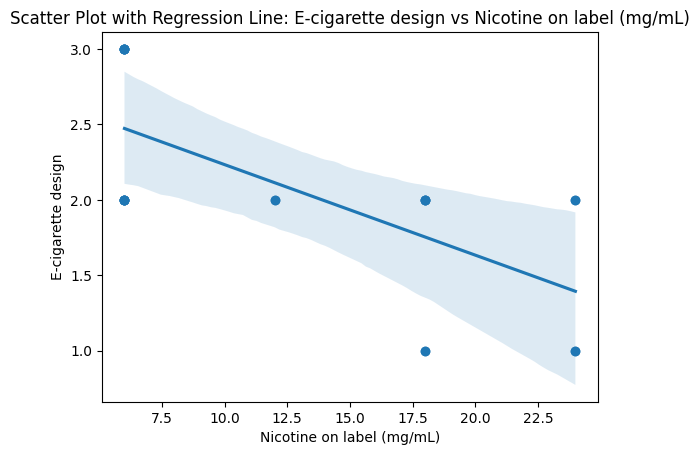

In [27]:
plt.scatter(merged_df['Nicotine on label (mg/mL)'], merged_df['E-cigarette design'])
sns.regplot(x=merged_df['Nicotine on label (mg/mL)'], y=merged_df['E-cigarette design'])
plt.xlabel('Nicotine on label (mg/mL)')
plt.ylabel('E-cigarette design')
plt.title('Scatter Plot with Regression Line: E-cigarette design vs Nicotine on label (mg/mL)')
plt.show()

In [28]:
pharmacokineticProfile_selected = pharmacokineticProfile[['Subject', 'Cmax (ng/mL)', 'AUC(0→∞) (ng/mL•min)', 'Tmax (min)', 'Half-life (min)', 'Retained nicotine dose (mg)']]  
pharmacokineticProfile_selected.loc[:, 'estimated_dose (mg)'] = pharmacokineticProfile_selected['AUC(0→∞) (ng/mL•min)'] * 1200 / 1000000
pharmacokineticProfile_selected.dropna(inplace=True)
pharmacokineticProfile_selected

/tmp/ipykernel_1701/1483154590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharmacokineticProfile_selected.loc[:, 'estimated_dose (mg)'] = pharmacokineticProfile_selected['AUC(0→∞) (ng/mL•min)'] * 1200 / 1000000
/tmp/ipykernel_1701/1483154590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharmacokineticProfile_selected.dropna(inplace=True)


,Subject,Cmax (ng/mL),AUC(0→∞) (ng/mL•min),Tmax (min),Half-life (min),Retained nicotine dose (mg),estimated_dose (mg)
0,1,6.9,815,2,148,0.84,0.9780
1,2,9.1,1345,5,81,1.63,1.6140
2,3,2.3,301,30,87,0.82,0.3612
3,4,8.9,1570,5,152,2.34,1.8840
4,5,15.5,682,2,62,1.30,0.8184
6,7,19.8,1813,2,152,2.42,2.1756
7,8,8.7,1336,5,132,1.52,1.6032
8,9,4.4,461,5,140,0.58,0.5532
9,10,6.1,332,2,78,0.60,0.3984
10,11,13.2,900,2,114,1.44,1.0800


Pearson correlation: 0.930
p-value: 0.000
Reject the null hypothesis


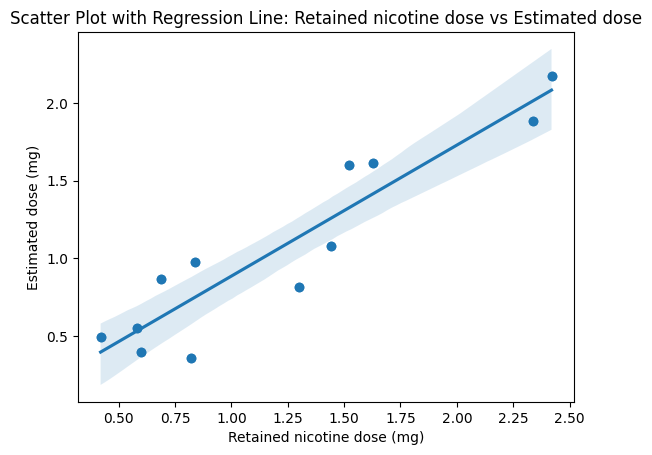

In [29]:
# Perform hypothesis test
corr, p_value = pearsonr(pharmacokineticProfile_selected['Retained nicotine dose (mg)'], pharmacokineticProfile_selected['estimated_dose (mg)'])

# Print the results
print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

plt.scatter(pharmacokineticProfile_selected['Retained nicotine dose (mg)'], pharmacokineticProfile_selected['estimated_dose (mg)'])
sns.regplot(x=pharmacokineticProfile_selected['Retained nicotine dose (mg)'], y=pharmacokineticProfile_selected['estimated_dose (mg)'])
plt.xlabel('Retained nicotine dose (mg)')
plt.ylabel('Estimated dose (mg)')
plt.title('Scatter Plot with Regression Line: Retained nicotine dose vs Estimated dose')
plt.show()


The Pearson correlation coefficient measures the linear relationship between two datasets. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr function from scipy.stats returns two values:

corr: The Pearson correlation coefficient. In your case, it's 0.930, which indicates a strong positive correlation between the two variables. This means that as the 'Retained nicotine dose (mg)' increases, the 'estimated_dose (mg)' also tends to increase.

p_value: The p-value for a hypothesis test whose null hypothesis is that the two variables are uncorrelated. In your case, the p-value is 0.000, which is less than 0.05, so you reject the null hypothesis and conclude that there is a statistically significant correlation between the two variables.

In summary, this analysis suggests that there is a strong positive correlation between 'Retained nicotine dose (mg)' and 'estimated_dose (mg)', and this correlation is statistically significant.(p = 0.00,corr = 0.93)

In [30]:
nicotine_retention = merged_df[['Subject','Measured nicotine (ug/mg)', 'E-cigarette design', '%\nNicotine\nretained','Self-reported smoking status','E-cig puffs per session']]
nicotine_retention =  nicotine_retention.merge(pharmacokineticProfile_selected, on='Subject')


In pharmacokinetics, Tmax is the time after administration of a drug when the maximum plasma concentration is reached. When the drug is administered intravenously, Tmax is typically the time taken for the drug concentration to reduce by half. However, when the drug is administered orally, Tmax will be the time it takes for the drug to be absorbed and reach peak plasma concentrations.

In the context of a DataFrame column, Tmax would likely represent the time at which each observed substance in the dataset reached its maximum concentration in the plasma.

In pharmacokinetics, Cmax is the maximum (or peak) serum concentration that a drug achieves in a specified compartment or test area of the body after the drug has been administrated and before the administration of a second dose.

It is a key factor in assessing the bioavailability of a drug, along with other parameters such as AUC (Area Under the Curve) and Tmax (time to reach Cmax).

In the context of a DataFrame column, Cmax would likely represent the maximum observed concentration of each substance in the dataset.

AUC (Area Under the Curve) from 0 to infinity, often denoted as AUC(0 -> ∞), is a pharmacokinetic parameter that represents the total drug exposure over time. It is calculated as the area under the drug concentration-time curve from the time of dosing (t=0) to an infinite time, effectively covering the entire lifespan of the drug in the body.

AUC(0 -> ∞) is used to compare the bioavailability of different drugs or different formulations of the same drug. It is also used to calculate other pharmacokinetic parameters such as clearance and volume of distribution.

In practical terms, AUC(0 -> ∞) is usually estimated by adding two components:

AUC(0 -> t) - the area under the curve from time zero to the last measurable concentration (calculated using the trapezoidal rule or other numerical integration methods).
AUC(t -> ∞) - the area from the last measurable concentration to infinity, which is estimated as Ct/Ke, where Ct is the last measurable concentration and Ke is the elimination rate constant.


In [37]:
# Calculate z-scores for the columns containing numerical data
z_scores = (nicotine_retention - nicotine_retention.mean()) / nicotine_retention.std()

# Define a threshold for outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Remove rows with outliers based on the z-scores
nicotine_retention_no_outliers = nicotine_retention[(z_scores < threshold).all(axis=1)]

# Print the updated DataFrame without outliers
nicotine_retention_no_outliers

,Subject,Measured nicotine (ug/mg),E-cigarette design,%\nNicotine\nretained,Self-reported smoking status,E-cig puffs per session,Cmax (ng/mL),AUC(0→∞) (ng/mL•min),Tmax (min),Half-life (min),Retained nicotine dose (mg),estimated_dose (mg)
0,1,15.3,2,99.6,0,10,6.9,815,2,148,0.84,0.9780
1,2,13.9,1,99.9,0,30,9.1,1345,5,81,1.63,1.6140
3,4,5.7,3,88.9,0,3,8.9,1570,5,152,2.34,1.8840
4,5,15.3,2,97.5,1,6,15.5,682,2,62,1.30,0.8184
5,7,12.1,2,99.7,0,3,19.8,1813,2,152,2.42,2.1756
6,8,5.0,3,93.0,1,15,8.7,1336,5,132,1.52,1.6032
7,9,12.6,1,99.8,0,5,4.4,461,5,140,0.58,0.5532
8,10,5.6,2,99.6,0,2,6.1,332,2,78,0.60,0.3984
9,11,5.0,3,99.8,0,10,13.2,900,2,114,1.44,1.0800
10,12,5.9,2,99.8,0,2,4.7,411,2,107,0.42,0.4932


In [32]:
nicotine_retention_no_outliers.corr()

,Subject,Measured nicotine (ug/mg),E-cigarette design,%\nNicotine\nretained,Self-reported smoking status,E-cig puffs per session,Cmax (ng/mL),AUC(0→∞) (ng/mL•min),Tmax (min),Half-life (min),Retained nicotine dose (mg),estimated_dose (mg)
Subject,1.000000,-0.691215,0.160822,0.239822,-0.116992,-0.497520,-0.200993,-0.455763,-0.335008,-0.350777,-0.448058,-0.455763
Measured nicotine (ug/mg),-0.691215,1.000000,-0.640838,0.355027,0.095972,0.305509,0.273529,0.065742,0.003223,0.086616,0.064003,0.065742
E-cigarette design,0.160822,-0.640838,1.000000,-0.627945,0.288675,-0.260546,0.232412,0.301965,-0.102869,0.241507,0.376345,0.301965
%\nNicotine\nretained,0.239822,0.355027,-0.627945,1.000000,-0.358389,0.074944,-0.000199,-0.476865,-0.541718,-0.314720,-0.522909,-0.476865
Self-reported smoking status,-0.116992,0.095972,0.288675,-0.358389,1.000000,0.137816,0.270857,0.064218,0.133631,-0.151599,0.111598,0.064218
E-cig puffs per session,-0.497520,0.305509,-0.260546,0.074944,0.137816,1.000000,0.006678,0.324793,0.483160,-0.092092,0.199056,0.324793
Cmax (ng/mL),-0.200993,0.273529,0.232412,-0.000199,0.270857,0.006678,1.000000,0.599883,-0.278200,0.103372,0.722386,0.599883
AUC(0→∞) (ng/mL•min),-0.455763,0.065742,0.301965,-0.476865,0.064218,0.324793,0.599883,1.000000,0.371470,0.452985,0.942562,1.000000
Tmax (min),-0.335008,0.003223,-0.102869,-0.541718,0.133631,0.483160,-0.278200,0.371470,1.000000,0.336288,0.301276,0.371470
Half-life (min),-0.350777,0.086616,0.241507,-0.314720,-0.151599,-0.092092,0.103372,0.452985,0.336288,1.000000,0.420507,0.452985


<Axes: >

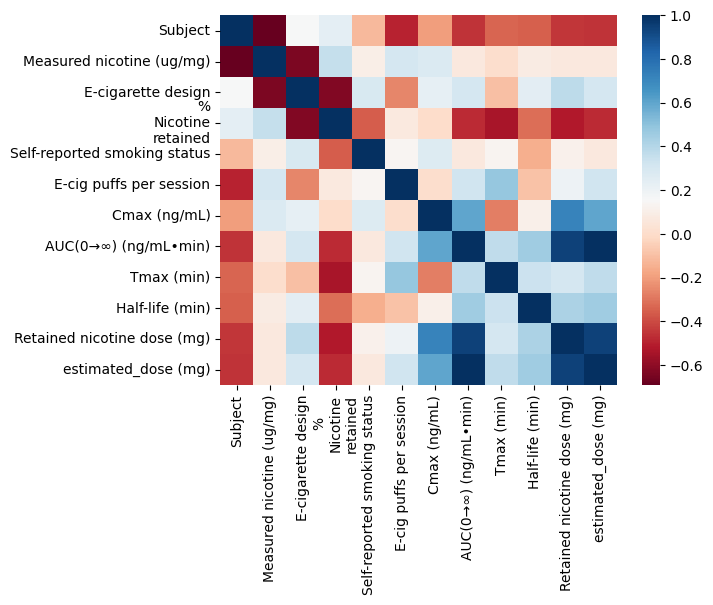

In [33]:
sns.heatmap(nicotine_retention_no_outliers.corr(), cmap='RdBu')

Pearson correlation: 0.722
p-value: 0.012
Reject the null hypothesis


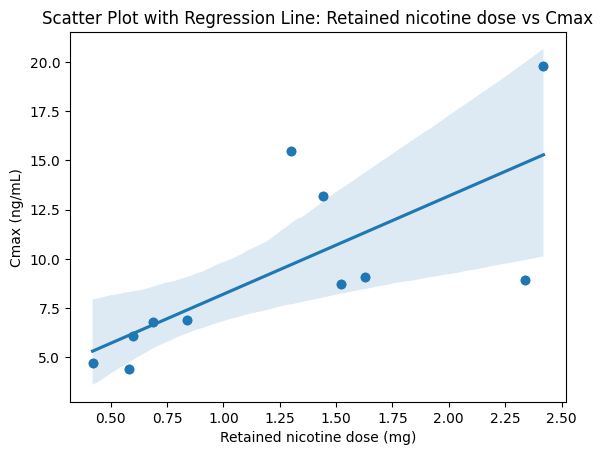

In [34]:
# Perform hypothesis test
corr, p_value = pearsonr(nicotine_retention_no_outliers['Retained nicotine dose (mg)'], nicotine_retention_no_outliers['Cmax (ng/mL)'])

# Print the results
print(f'Pearson correlation: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

plt.scatter(nicotine_retention_no_outliers['Retained nicotine dose (mg)'], nicotine_retention_no_outliers['Cmax (ng/mL)'])
sns.regplot(x=nicotine_retention_no_outliers['Retained nicotine dose (mg)'], y=nicotine_retention_no_outliers['Cmax (ng/mL)'])
plt.xlabel('Retained nicotine dose (mg)')
plt.ylabel('Cmax (ng/mL)')
plt.title('Scatter Plot with Regression Line: Retained nicotine dose vs Cmax')
plt.show()


In [35]:
nicotine_retention_no_outliers = nicotine_retention_no_outliers.drop('Subject', axis=1)


Index(['Measured nicotine (ug/mg)', 'E-cigarette design',
       '%\nNicotine\nretained', 'Self-reported smoking status',
       'E-cig puffs per session', 'Cmax (ng/mL)', 'AUC(0→∞) (ng/mL•min)',
       'Tmax (min)', 'Half-life (min)', 'Retained nicotine dose (mg)',
       'estimated_dose (mg)'],
      dtype='object')


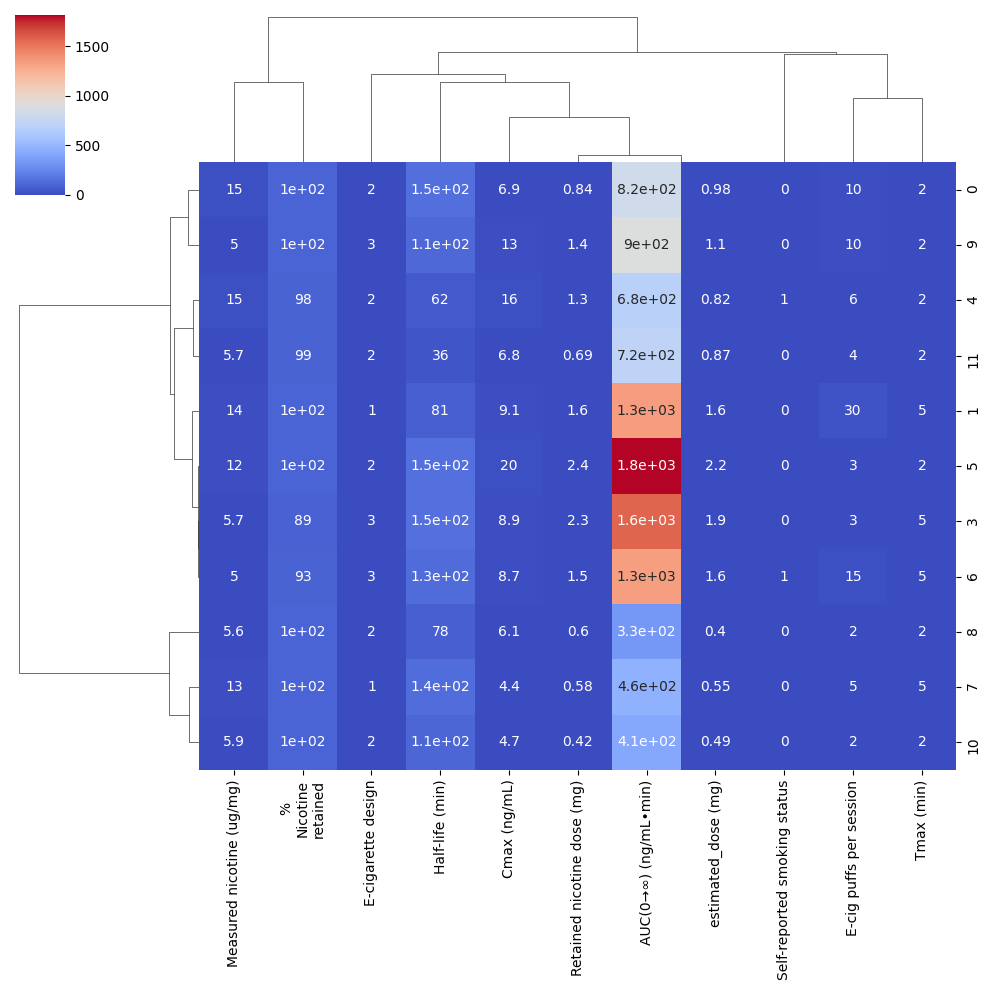

In [36]:
print(nicotine_retention_no_outliers.columns)
print(sns.clustermap(nicotine_retention_no_outliers,metric='correlation', annot=True, cmap='coolwarm'))

A hierarchically-clustered heatmap of a matrix dataset is a data visualization technique that is often used in data science and bioinformatics. Here's a breakdown:

Matrix Dataset: This is a two-dimensional (2D) array of data where each element represents a specific connection or relationship between the row and column that it resides in.

Heatmap: A heatmap is a graphical representation of data where individual values contained in a matrix are represented as colors. It's a way of representing tabular, numerical data where the cells are colored depending upon the contained number.

Hierarchical Clustering: This is a method of cluster analysis which seeks to build a hierarchy of clusters. The end result is a tree-based representation of the objects, which is called a dendrogram.

Hierarchically-clustered Heatmap: By combining hierarchical clustering and heatmaps, we can visually represent clusters of data points and their relative similarities. The dendrogram aids in interpreting the arrangement of the clusters. The similar data points are grouped together which is represented by the closeness of the heat colors.

In the context of the sns.clustermap() function, it uses hierarchical clustering for both the rows and the columns of the matrix dataset. This means that it not only groups similar data points together, but it also arranges the rows and columns in such a way that similar rows are near each other and similar columns are near each other. This can make patterns in the data more apparent.
